## **IMPORTING LIBRARIES AND DATA**

In [6]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print("All libraries loaded")

All libraries loaded


In [8]:
os.chdir('/content/drive/MyDrive/walkup_song_analysis')

mlb_data = pd.read_csv('mlb_data_for_project.csv')
biographical_data = pd.read_csv('biographical_data_for_project.csv')
song_data = pd.read_csv('song_data_for_project.csv')
walkup_songs = pd.read_csv('walkup_songs_for_project.csv')
submission_ids = pd.read_csv('submission_ids_for_project.csv')

print("Datasets loaded successfully from Drive!")

Datasets loaded successfully from Drive!


## **DATA EXPLORATION**

In [9]:
# MLB DATA
print(mlb_data.head())
print("\nUnique seasons:", mlb_data['SEASON'].unique())
print("Unique players:", mlb_data['PLAYER_ID'].nunique())
print("Home/Away split:", mlb_data['HOME_AWAY'].value_counts())

   SEASON                         PLAYER_ID HOME_AWAY   G   PA   AB   H  X1B  \
0    2022  5cc30873a52a6a8e780085c2fce53f97      home  53  169  143  35   20   
1    2022  eb09596e4b17b3dbd2678ed016c2328f      home  56  211  193  59   49   
2    2022  3312c6017368dd2f720b1161bbbf5867      home  73  263  236  57   32   
3    2022  1c614b599470f5c2df9170ee534a6208      home  71  265  229  46   25   
4    2022  fee7b40d2e6119a0e5b5d0cd955b48e5      home  66  268  240  59   41   

   X2B  X3B  ...     IFFB.     HR.FB      IFH.  BUH.     PULL.     CENT.  \
0    5    0  ...  0.196721  0.163934  0.052632   0.0  0.523810  0.293651   
1    6    0  ...  0.027778  0.111111  0.039474   0.0  0.328767  0.383562   
2   18    2  ...  0.128205  0.064103  0.033898   0.0  0.390110  0.390110   
3   11    0  ...  0.130952  0.119048  0.071429   1.0  0.449438  0.353933   
4   12    0  ...  0.134615  0.115385  0.031250   0.0  0.368984  0.331551   

      OPPO.     SOFT.      MED.     HARD.  
0  0.182540  0.190

In [10]:
# BIOGRAPHICAL DATA
print(biographical_data.head())

                          PLAYER_ID  BIRTH_DATE BIRTH_COUNTRY BIRTH_STATE  \
0  60fd54d6c854797c5465246f9b6a1ce6  2000-10-03           USA          GA   
1  442b17b81924a2b87d18523498472eee  1987-01-29          Cuba  Cienfuegos   
2  a9e36184c13b79c05af92b316cd76375  1999-06-24     Venezuela       Zulia   
3  59bcfd7cfe0204b465a9c85b00debbde  1997-12-18     Venezuela      Vargas   
4  fc1b0ad395f75db23ac66029fedc0e84  1995-09-02          D.R.    Santiago   

   WEIGHT  HEIGHT BATS THROWS       DEBUT  
0     185      74    L      R  2022-04-08  
1     235      75    R      R  2014-03-31  
2     215      70    L      L  2023-08-22  
3     205      72    R      R  2018-04-25  
4     210      72    R      R  2018-05-22  


In [11]:
# SONG DATA
print(song_data.head())
print(song_data.info())

# FEATURE DATA

print("\nSong Features:")
print(song_data.columns.tolist())

                                 ID                       NAME  \
0  0eaeb09681b1acebea33cfdc6c34257d     Bring It On Home To Me   
1  f8af68fe724a3f92b13c4147f6834c10                You Send Me   
2  235b396836509892e8966152f79dd05e           Summertime Blues   
3  11218a13831df1b4aba37a3f2b279bf2  Breaking Up Is Hard to Do   
4  8218c2c762766797101f33466205a25e   (What A) Wonderful World   

             ARTISTS  POPULARITY  DURATION_MS  EXPLICIT RELEASE_DATE  \
0      ['Sam Cooke']          65     165280.0         0   1960-01-01   
1      ['Sam Cooke']          64     165560.0         0   1960-01-01   
2  ['Eddie Cochran']          64     119360.0         0   1960-05-01   
3    ['Neil Sedaka']          63     139200.0         0   1960-12-30   
4      ['Sam Cooke']          62     129293.0         0   1960-01-01   

   DANCEABILITY  ENERGY  KEY  LOUDNESS  MODE  SPEECHINESS  ACOUSTICNESS  \
0         0.482   0.569    0    -5.897     1       0.0328         0.617   
1         0.553   0.

In [12]:
# WALKUP SONGS
print(walkup_songs.head())
print("Unique players with songs:", walkup_songs['PLAYER_ID'].nunique())
print("Unique songs:", walkup_songs['WALKUP_SONG_ID'].nunique())

# Evaluate the walkup songs of the 9 target players
target_players = submission_ids['PLAYER_ID'].tolist()
target_walkup_songs = walkup_songs[walkup_songs['PLAYER_ID'].isin(target_players)]

print("\nWalkup Songs of Target Players:")
print(target_walkup_songs)

                          PLAYER_ID  SEASON                    WALKUP_SONG_ID
0  2a2b670f48eba7b83f80022064c06c99    2022  6d671b623cbcf54ca349253bc4afbded
1  2a2b670f48eba7b83f80022064c06c99    2023  89041fd4acdca4228fa1cc96456c81e1
2  18c64b1c775f773fd01eb0b73c348efd    2022  a5b351e79abedf065ffc4be03082c2e5
3  18c64b1c775f773fd01eb0b73c348efd    2023  3524369a19b60b8151102e86380d9127
4  18c64b1c775f773fd01eb0b73c348efd    2024  3524369a19b60b8151102e86380d9127
Unique players with songs: 1056
Unique songs: 1744

Walkup Songs of Target Players:
                             PLAYER_ID  SEASON  \
781   174f6e324871e580eb9e37ec8e031027    2023   
782   174f6e324871e580eb9e37ec8e031027    2024   
783   174f6e324871e580eb9e37ec8e031027    2025   
902   07d4871bf68c5aaaa51526714ee66d3e    2022   
903   07d4871bf68c5aaaa51526714ee66d3e    2024   
904   07d4871bf68c5aaaa51526714ee66d3e    2025   
1460  34c74e211da3e913d415c04358792d36    2022   
1461  34c74e211da3e913d415c04358792d36    2023  

In [13]:
# SUBMISSION IDs (The 9 target players)
print(submission_ids)

                          PLAYER_ID
0  34c74e211da3e913d415c04358792d36
1  058551d1d436fa5205bc5cc31b97109c
2  07d4871bf68c5aaaa51526714ee66d3e
3  806c19f1f39c326204f6b7445cf60b01
4  86e6ecb8b605bea244f4aa2ed7eedd99
5  3422eb78d602b650907e710ec30f8fc9
6  5ffc7331b7447a71a1ff4f3b487d9327
7  174f6e324871e580eb9e37ec8e031027
8  201cbd51fda9d7b6cfbeabb79131cd8e


**MERGING DATASETS**

In [14]:
# Merging walkup_songs with song_data
print("Merging walkup_songs with song_data...")
walkup_songs_with_features = pd.merge(walkup_songs, song_data, left_on='WALKUP_SONG_ID', right_on='ID', how='left')
print(f"Walkup Songs with Features: {walkup_songs_with_features.shape[0]} rows, {walkup_songs_with_features.shape[1]} columns")
print(walkup_songs_with_features.head())

Merging walkup_songs with song_data...
Walkup Songs with Features: 2679 rows, 22 columns
                          PLAYER_ID  SEASON                    WALKUP_SONG_ID  \
0  2a2b670f48eba7b83f80022064c06c99    2022  6d671b623cbcf54ca349253bc4afbded   
1  2a2b670f48eba7b83f80022064c06c99    2023  89041fd4acdca4228fa1cc96456c81e1   
2  18c64b1c775f773fd01eb0b73c348efd    2022  a5b351e79abedf065ffc4be03082c2e5   
3  18c64b1c775f773fd01eb0b73c348efd    2023  3524369a19b60b8151102e86380d9127   
4  18c64b1c775f773fd01eb0b73c348efd    2024  3524369a19b60b8151102e86380d9127   

                                 ID  \
0  6d671b623cbcf54ca349253bc4afbded   
1  89041fd4acdca4228fa1cc96456c81e1   
2  a5b351e79abedf065ffc4be03082c2e5   
3  3524369a19b60b8151102e86380d9127   
4  3524369a19b60b8151102e86380d9127   

                                                NAME  \
0                       Good Vibrations - Remastered   
1  Hosanna - From "Jesus Christ Superstar" Soundt...   
2                    

In [15]:
# Merging stats (mlb_data) with walkup_songs_with_features
# need home game stats
print("Merging stats with walkup_songs_with_features...")
home_stats = mlb_data[mlb_data['HOME_AWAY'] == 'home'].copy()

mlb_stats_with_songs = pd.merge(walkup_songs_with_features, home_stats, on=['PLAYER_ID', 'SEASON'], how='inner')

print(f"Stats with Songs: {mlb_stats_with_songs.shape[0]} rows, {mlb_stats_with_songs.shape[1]} columns")
print(f"Players with Stats and Song data: {mlb_stats_with_songs['PLAYER_ID'].nunique()}\n\n")

# example
print(mlb_stats_with_songs[['PLAYER_ID', 'SEASON', 'NAME', 'ARTISTS', 'OPS', 'WRC.', 'ENERGY', 'VALENCE', 'TEMPO']].head())

Merging stats with walkup_songs_with_features...
Stats with Songs: 2613 rows, 69 columns
Players with Stats and Song data: 1026


                          PLAYER_ID  SEASON  \
0  2a2b670f48eba7b83f80022064c06c99    2022   
1  2a2b670f48eba7b83f80022064c06c99    2023   
2  18c64b1c775f773fd01eb0b73c348efd    2022   
3  18c64b1c775f773fd01eb0b73c348efd    2023   
4  18c64b1c775f773fd01eb0b73c348efd    2024   

                                                NAME  \
0                       Good Vibrations - Remastered   
1  Hosanna - From "Jesus Christ Superstar" Soundt...   
2                                               Cake   
3                              You'll Be In My Heart   
4                              You'll Be In My Heart   

                         ARTISTS       OPS       WRC.  ENERGY  VALENCE  \
0             ['The Beach Boys']  0.702140  96.990002   0.495    0.380   
1  ['Ted Neeley', 'Bob Bingham']  0.434075  28.110031   0.484    0.351   
2           ['Melanie Martin

In [16]:
# Seeing if there are any missing values to clean
print("Missing values in some key performance metrics:")
key_metrics = ['OPS', 'WRC.', 'AVG', 'WOBA', 'ISO', 'H', 'PA']
print(mlb_stats_with_songs[key_metrics].isnull().sum())

print("\nMissing values in some key song features:")
song_features = ['ENERGY', 'VALENCE', 'TEMPO', 'DANCEABILITY', 'LOUDNESS']
print(mlb_stats_with_songs[song_features].isnull().sum())

Missing values in some key performance metrics:
OPS     0
WRC.    0
AVG     0
WOBA    0
ISO     0
H       0
PA      0
dtype: int64

Missing values in some key song features:
ENERGY          53
VALENCE         53
TEMPO           53
DANCEABILITY    53
LOUDNESS        53
dtype: int64


In [17]:
stats_clean = mlb_stats_with_songs.dropna(subset=key_metrics + song_features)
print(f"{len(stats_clean)} records with complete data\n\n")
print("Stats cleaned up: ")
print(stats_clean.head())

2560 records with complete data


Stats cleaned up: 
                          PLAYER_ID  SEASON                    WALKUP_SONG_ID  \
0  2a2b670f48eba7b83f80022064c06c99    2022  6d671b623cbcf54ca349253bc4afbded   
1  2a2b670f48eba7b83f80022064c06c99    2023  89041fd4acdca4228fa1cc96456c81e1   
2  18c64b1c775f773fd01eb0b73c348efd    2022  a5b351e79abedf065ffc4be03082c2e5   
3  18c64b1c775f773fd01eb0b73c348efd    2023  3524369a19b60b8151102e86380d9127   
4  18c64b1c775f773fd01eb0b73c348efd    2024  3524369a19b60b8151102e86380d9127   

                                 ID  \
0  6d671b623cbcf54ca349253bc4afbded   
1  89041fd4acdca4228fa1cc96456c81e1   
2  a5b351e79abedf065ffc4be03082c2e5   
3  3524369a19b60b8151102e86380d9127   
4  3524369a19b60b8151102e86380d9127   

                                                NAME  \
0                       Good Vibrations - Remastered   
1  Hosanna - From "Jesus Christ Superstar" Soundt...   
2                                               Cake   
3

In [18]:
# Calculate correlations between song features and performance metrics

print("CORRELATIONS: Song Features vs Performance Metrics\n\n")


mlb_stats_cols = ['OPS', 'WRC.', 'AVG', 'WOBA', 'ISO', 'HR', 'BB.', 'K.']
song_cols = ['ENERGY', 'VALENCE', 'TEMPO', 'DANCEABILITY', 'LOUDNESS', 'ACOUSTICNESS']

# Calculate correlation matrix
correlation_matrix = stats_clean[song_cols + mlb_stats_cols].corr()

mlb_stats_song_corr = correlation_matrix.loc[song_cols, mlb_stats_cols]
print(mlb_stats_song_corr.round(3))

CORRELATIONS: Song Features vs Performance Metrics


                OPS   WRC.    AVG   WOBA    ISO     HR    BB.     K.
ENERGY        0.018  0.015  0.019  0.018  0.011 -0.001  0.001 -0.019
VALENCE       0.004  0.006 -0.007  0.005  0.012  0.020  0.027  0.029
TEMPO        -0.020 -0.013 -0.033 -0.018 -0.004 -0.002  0.022 -0.007
DANCEABILITY  0.034  0.026  0.031  0.032  0.031  0.052  0.011  0.013
LOUDNESS     -0.004 -0.006  0.016 -0.003 -0.029 -0.011 -0.005 -0.038
ACOUSTICNESS -0.018 -0.019 -0.031 -0.022  0.009  0.047 -0.006  0.019


## **HEATMAP VISUALIZATION**

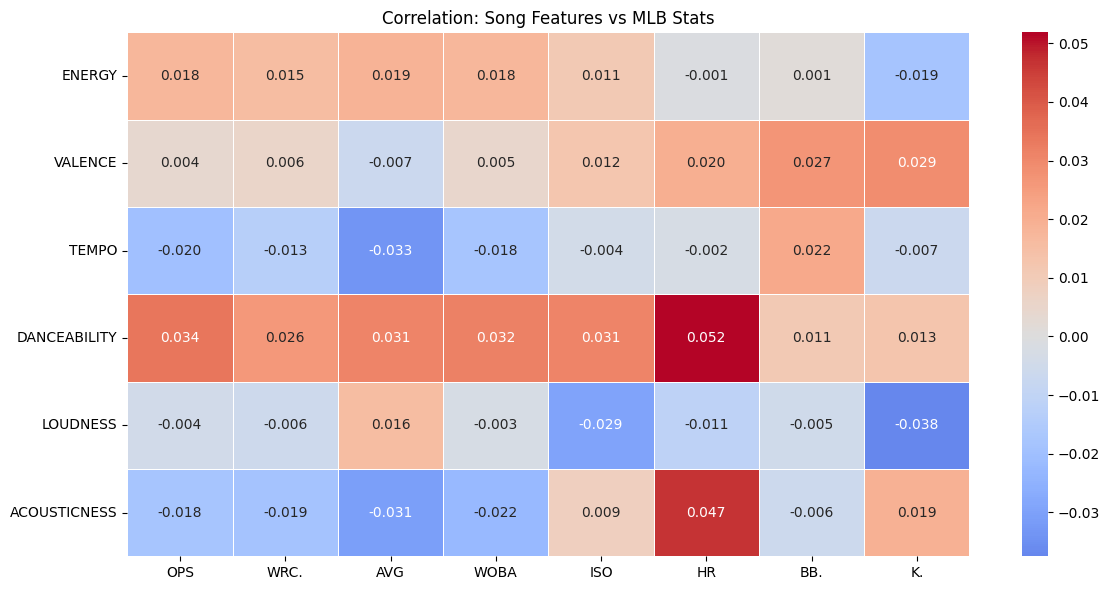

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(mlb_stats_song_corr, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', linewidths=0.5)
plt.title('Correlation: Song Features vs MLB Stats')
plt.tight_layout()
plt.show()

In [20]:
# Compare home vs away performance for same players
print("Comparing HOME vs AWAY performance...")

away_stats = mlb_data[mlb_data['HOME_AWAY'] == 'away'].copy()

home_away_comparison = pd.merge(
    home_stats[['PLAYER_ID', 'SEASON', 'OPS', 'WRC.', 'AVG']],
    away_stats[['PLAYER_ID', 'SEASON', 'OPS', 'WRC.', 'AVG']],
    on=['PLAYER_ID', 'SEASON'],
    suffixes=('_home', '_away')
)

print(f"\nPlayers with both home and away data: {len(home_away_comparison)}")
print("\nAverage performance:")
print(f"Home OPS: {home_away_comparison['OPS_home'].mean():.3f}")
print(f"Away OPS: {home_away_comparison['OPS_away'].mean():.3f}")
print(f"\nHome wRC+: {home_away_comparison['WRC._home'].mean():.3f}")
print(f"Away wRC+: {home_away_comparison['WRC._away'].mean():.3f}")

Comparing HOME vs AWAY performance...

Players with both home and away data: 2555

Average performance:
Home OPS: 0.663
Away OPS: 0.638

Home wRC+: 85.293
Away wRC+: 78.898


## **PLAYER PROFILING/ANALYSIS**



In [21]:
# Get detailed info on the 9 target players
print("PROFILING THE 9 TARGET PLAYERS\n")

target_player_ids = submission_ids['PLAYER_ID'].tolist()

target_player_stats = stats_clean[stats_clean['PLAYER_ID'].isin(target_player_ids)]
print(target_player_stats[['PLAYER_ID', 'SEASON', 'WALKUP_SONG_ID']])
print(f"\nTarget players with performance data: {target_player_stats['PLAYER_ID'].nunique()}")
print(f"Target players with performance data: {len(target_player_stats)}")

target_bio = biographical_data[biographical_data['PLAYER_ID'].isin(target_player_ids)]

print(f"Target players with biographical data: {len(target_bio)}")


PROFILING THE 9 TARGET PLAYERS

                             PLAYER_ID  SEASON  \
757   174f6e324871e580eb9e37ec8e031027    2023   
758   174f6e324871e580eb9e37ec8e031027    2024   
759   174f6e324871e580eb9e37ec8e031027    2025   
876   07d4871bf68c5aaaa51526714ee66d3e    2022   
877   07d4871bf68c5aaaa51526714ee66d3e    2024   
878   07d4871bf68c5aaaa51526714ee66d3e    2025   
1425  34c74e211da3e913d415c04358792d36    2022   
1426  34c74e211da3e913d415c04358792d36    2023   
1427  34c74e211da3e913d415c04358792d36    2024   
1428  34c74e211da3e913d415c04358792d36    2025   
1706  201cbd51fda9d7b6cfbeabb79131cd8e    2023   
1707  201cbd51fda9d7b6cfbeabb79131cd8e    2025   
1943  5ffc7331b7447a71a1ff4f3b487d9327    2023   
1944  5ffc7331b7447a71a1ff4f3b487d9327    2024   
1945  5ffc7331b7447a71a1ff4f3b487d9327    2025   
2205  806c19f1f39c326204f6b7445cf60b01    2022   
2206  806c19f1f39c326204f6b7445cf60b01    2023   
2207  806c19f1f39c326204f6b7445cf60b01    2024   
2208  806c19f1f39c

In [22]:
print("Breakdown of target players by season:\n")

for player_id in target_player_ids:
      num_seasons = len(target_player_stats[target_player_stats['PLAYER_ID'] == player_id])
      print(f"Player {player_id[:8]}... Has {num_seasons} season(s) of data")

Breakdown of target players by season:

Player 34c74e21... Has 4 season(s) of data
Player 058551d1... Has 4 season(s) of data
Player 07d4871b... Has 3 season(s) of data
Player 806c19f1... Has 4 season(s) of data
Player 86e6ecb8... Has 4 season(s) of data
Player 3422eb78... Has 4 season(s) of data
Player 5ffc7331... Has 3 season(s) of data
Player 174f6e32... Has 3 season(s) of data
Player 201cbd51... Has 2 season(s) of data


In [23]:
# Get ALL performance stats for the 9 target players
print("Getting complete performance stats for target players...")

# Filter for only the 9 target players at home games
target_players_home_stats = mlb_data[
    (mlb_data['PLAYER_ID'].isin(target_player_ids)) & (mlb_data['HOME_AWAY'] == 'home')
]

print(f"Total performance records for our 9 players: {len(target_players_home_stats)}")

# Merge the target players' stats with their biographical data
target_players_with_bio = pd.merge(
    target_players_home_stats,
    target_bio,
    on='PLAYER_ID',
    how='left'
)

print("\nPerformance summary for each target player:")
for player_id in target_player_ids:
    individual_player_data = target_players_with_bio[target_players_with_bio['PLAYER_ID'] == player_id]

    if not individual_player_data.empty:
        player_bio_info = individual_player_data.iloc[0]
        print(f"\nPlayer {player_id[:12]}... ({player_bio_info['BIRTH_COUNTRY']}, Bats: {player_bio_info['BATS']})")
        print(f"Seasons: {sorted(individual_player_data['SEASON'].unique())}")
        print(f"Avg OPS: {individual_player_data['OPS'].mean():.3f}, Avg wRC+: {individual_player_data['WRC.'].mean():.1f}")
        print(f"Avg HR: {individual_player_data['HR'].mean():.1f}, Avg AVG: {individual_player_data['AVG'].mean():.3f}")

Getting complete performance stats for target players...
Total performance records for our 9 players: 31

Performance summary for each target player:

Player 34c74e211da3... (USA, Bats: R)
Seasons: [np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Avg OPS: 0.693, Avg wRC+: 88.2
Avg HR: 4.5, Avg AVG: 0.265

Player 058551d1d436... (USA, Bats: L)
Seasons: [np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Avg OPS: 0.769, Avg wRC+: 105.2
Avg HR: 6.5, Avg AVG: 0.261

Player 07d4871bf68c... (USA, Bats: L)
Seasons: [np.int64(2022), np.int64(2024), np.int64(2025)]
Avg OPS: 0.700, Avg wRC+: 96.5
Avg HR: 3.3, Avg AVG: 0.252

Player 806c19f1f39c... (D.R., Bats: R)
Seasons: [np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Avg OPS: 0.675, Avg wRC+: 85.9
Avg HR: 2.5, Avg AVG: 0.270

Player 86e6ecb8b605... (USA, Bats: L)
Seasons: [np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Avg OPS: 0.681, Avg wRC+: 81.2
Avg HR: 6.2, Avg AVG: 0.208

Pla

**Walkup Song History**

In [24]:
for player_id in target_player_ids:
    # get player_songs (all the walkup songs the player (player_id) has used)
    player_songs = walkup_songs[walkup_songs['PLAYER_ID'] == player_id]

    if len(player_songs) > 0:
        print(f"\nPlayer {player_id[:12]}... HAS {len(player_songs)} previous song(s)")
        # Get song details
        for _, row in player_songs.iterrows():
            song_info = song_data[song_data['ID'] == row['WALKUP_SONG_ID']]
            if len(song_info) > 0:
                print(f"  {row['SEASON']}: {song_info.iloc[0]['NAME']} - {song_info.iloc[0]['ARTISTS']}")
    else:
        print(f"\nPlayer {player_id[:12]}... NO historical walkup songs")


Player 34c74e211da3... HAS 4 previous song(s)
  2022: You Might Need Somebody - ['Randy Crawford']
  2023: Never - ['Boyz II Men']
  2024: Never - ['Boyz II Men']
  2025: Deine Zeit - ['Seeed']

Player 058551d1d436... HAS 4 previous song(s)
  2022: Coeur abîmé - ['UZI']
  2023: So What - ['The Cure']
  2024: Las Mujeres del Itsmo - ['Chico Che']
  2025: Las Mujeres del Itsmo - ['Chico Che']

Player 07d4871bf68c... HAS 3 previous song(s)
  2022: 071 - Stimme aus der Unterwelt - Teil 14 - ['TKKG Retro-Archiv']
  2024: 071 - Stimme aus der Unterwelt - Teil 14 - ['TKKG Retro-Archiv']
  2025: 071 - Stimme aus der Unterwelt - Teil 14 - ['TKKG Retro-Archiv']

Player 806c19f1f39c... HAS 4 previous song(s)
  2022: Fire Ball Mail - ['Flatt & Scruggs']
  2023: Fire Ball Mail - ['Flatt & Scruggs']
  2024: Balla - Pop mix - ["Paps'n'Skar"]
  2025: Won't Go Quietly - Radio Edit - ['Example']

Player 86e6ecb8b605... HAS 4 previous song(s)
  2022: Part of Your World (Reprise) - From "The Little Merma

**ANALYZING SONG FEATURE PREFERENCES**

In [25]:
for player_id in target_player_ids:
    player_songs_data = walkup_songs[walkup_songs['PLAYER_ID'] == player_id]

    if len(player_songs_data) > 0:
        # Get song features for this player's historical songs
        player_song_ids = player_songs_data['WALKUP_SONG_ID'].tolist()
        player_song_features = song_data[song_data['ID'].isin(player_song_ids)]

        if len(player_song_features) > 0:
            print(f"\nPlayer {player_id[:12]}...")
            print(f"  Number of songs used: {len(player_song_features)}")
            print(f"  Avg Energy: {player_song_features['ENERGY'].mean():.3f}")
            print(f"  Avg Valence: {player_song_features['VALENCE'].mean():.3f}")
            print(f"  Avg Tempo: {player_song_features['TEMPO'].mean():.1f}")
            print(f"  Avg Danceability: {player_song_features['DANCEABILITY'].mean():.3f}")
            print(f"  Explicit songs: {player_song_features['EXPLICIT'].sum()}/{len(player_song_features)}")


Player 34c74e211da3...
  Number of songs used: 3
  Avg Energy: 0.586
  Avg Valence: 0.555
  Avg Tempo: 88.8
  Avg Danceability: 0.554
  Explicit songs: 0/3

Player 058551d1d436...
  Number of songs used: 3
  Avg Energy: 0.725
  Avg Valence: 0.574
  Avg Tempo: 143.9
  Avg Danceability: 0.636
  Explicit songs: 1/3

Player 07d4871bf68c...
  Number of songs used: 1
  Avg Energy: 0.501
  Avg Valence: 0.665
  Avg Tempo: 117.4
  Avg Danceability: 0.715
  Explicit songs: 0/1

Player 806c19f1f39c...
  Number of songs used: 3
  Avg Energy: 0.818
  Avg Valence: 0.830
  Avg Tempo: 130.7
  Avg Danceability: 0.530
  Explicit songs: 0/3

Player 86e6ecb8b605...
  Number of songs used: 3
  Avg Energy: 0.456
  Avg Valence: 0.417
  Avg Tempo: 109.7
  Avg Danceability: 0.379
  Explicit songs: 0/3

Player 3422eb78d602...
  Number of songs used: 1
  Avg Energy: 0.853
  Avg Valence: 0.918
  Avg Tempo: 97.0
  Avg Danceability: 0.729
  Explicit songs: 0/1

Player 5ffc7331b744...
  Number of songs used: 2
  Av

## **STATISTICAL MODELIING - FINDING SIMILAR SUCCESSFUL PLAYERS**

In [37]:
# Find successful players with similar characteristics to each target player
# Calculate age from birthdate for both datasets
from datetime import datetime

biographical_data['BIRTH_DATE'] = pd.to_datetime(biographical_data['BIRTH_DATE'])
biographical_data['AGE'] = ((datetime.now() - biographical_data['BIRTH_DATE']).dt.days / 365.25).round()

# Merge stats_clean with biographical_data to get the needed columns
stats_clean_with_bio = pd.merge(
    stats_clean,
    biographical_data[['PLAYER_ID', 'BATS', 'BIRTH_COUNTRY', 'AGE']],
    on='PLAYER_ID',
    how='left'
)

target_players_with_bio = pd.merge(
    target_players_home_stats,
    biographical_data[['PLAYER_ID', 'AGE', 'BATS', 'BIRTH_COUNTRY']],
    on='PLAYER_ID',
    how='left'
)

AGE_RANGE = 4

for player_id in target_player_ids:
    target_player_info = target_players_with_bio[target_players_with_bio['PLAYER_ID'] == player_id]

    if len(target_player_info) > 0:
        target_bio = target_player_info.iloc[0]
        target_avg_stats = target_player_info[['OPS', 'WRC.', 'HR', 'AVG']].mean()

        print(f"TARGET: Player {player_id[:12]}...")
        print(f"  {target_bio['BIRTH_COUNTRY']}, Bats: {target_bio['BATS']}, Age: {int(target_bio['AGE'])}")
        print(f"  OPS: {target_avg_stats['OPS']:.3f}, wRC+: {target_avg_stats['WRC.']:.1f}")

        # Find similar successful players (same batting hand, birth country, similar age, wRC+ > 100)
        similar_successful_players = stats_clean_with_bio[
            (stats_clean_with_bio['PLAYER_ID'] != player_id) &
            (stats_clean_with_bio['BATS'] == target_bio['BATS']) &
            (stats_clean_with_bio['WRC.'] > 100) &
            (stats_clean_with_bio['BIRTH_COUNTRY'] == target_bio['BIRTH_COUNTRY']) &
            (abs(stats_clean_with_bio['AGE'] - target_bio['AGE']) <= AGE_RANGE)
        ]

        if len(similar_successful_players) > 0:
            print(f"  Found {similar_successful_players['PLAYER_ID'].nunique()} similar successful players (within {AGE_RANGE} years of age)")

            # Get the mean features of all the successful players' walkup songs
            avg_features = similar_successful_players[['ENERGY', 'VALENCE', 'TEMPO', 'DANCEABILITY']].mean()
            print(f"  Their avg song features:")
            print(f"    Energy: {avg_features['ENERGY']:.3f}")
            print(f"    Valence: {avg_features['VALENCE']:.3f}")
            print(f"    Tempo: {avg_features['TEMPO']:.1f}")
            print(f"    Danceability: {avg_features['DANCEABILITY']:.3f}\n\n")
        else:
            print(f"  No similar players found within {AGE_RANGE} years\n\n")

TARGET: Player 34c74e211da3...
  USA, Bats: R, Age: 29
  OPS: 0.693, wRC+: 88.2
  Found 130 similar successful players (within 4 years of age)
  Their avg song features:
    Energy: 0.625
    Valence: 0.607
    Tempo: 120.0
    Danceability: 0.628


TARGET: Player 058551d1d436...
  USA, Bats: L, Age: 30
  OPS: 0.769, wRC+: 105.2
  Found 119 similar successful players (within 4 years of age)
  Their avg song features:
    Energy: 0.620
    Valence: 0.547
    Tempo: 120.5
    Danceability: 0.593


TARGET: Player 07d4871bf68c...
  USA, Bats: L, Age: 28
  OPS: 0.700, wRC+: 96.5
  Found 114 similar successful players (within 4 years of age)
  Their avg song features:
    Energy: 0.639
    Valence: 0.558
    Tempo: 118.2
    Danceability: 0.595


TARGET: Player 806c19f1f39c...
  D.R., Bats: R, Age: 31
  OPS: 0.675, wRC+: 85.9
  Found 26 similar successful players (within 4 years of age)
  Their avg song features:
    Energy: 0.651
    Valence: 0.602
    Tempo: 116.2
    Danceability: 0.595



In [32]:
# Function which takes in target features, used songs, and the player id
# Return a song recommendation for the player (player_id)
import zlib

def get_song_recommendation(target_features, used_songs=[], player_id=None):
    """This function will match songs based on the target features"""

    available_songs = song_data[~song_data['ID'].isin(used_songs)].copy()

    # Calculates and quantifies how close each song is to the target features using Euclidean distance
    available_songs['match_score'] = (
        (available_songs['ENERGY'] - target_features['ENERGY']) ** 2 +
        (available_songs['VALENCE'] - target_features['VALENCE']) ** 2 +
        (available_songs['DANCEABILITY'] - target_features['DANCEABILITY']) ** 2 +
        ((available_songs['TEMPO'] - target_features['TEMPO']) / 100) ** 2
    ) ** 0.5

    # Get popular songs that match best
    popular_songs = available_songs[available_songs['POPULARITY'] > 70]
    best_matches = popular_songs.nsmallest(50, 'match_score')

    player_offset = zlib.crc32(player_id.encode('utf-8')) % 50
    recommendations = best_matches.iloc[player_offset]

    return recommendations

In [34]:
# EXPERIMENT: WEIGHTED FEATURE MATCHING
# Rationale: Instead of treating all audio features equally, we weight them
# based on their correlation with wRC+ (found in our earlier analysis).
# Features with higher correlation to success get more "say" in the match.

# weights based off of correlation matrix above (with WRC+)
import zlib


weights = {
    'ENERGY': 0.015,
    'VALENCE': 0.006,
    'TEMPO': 0.013,
    'DANCEABILITY': 0.026
}

total_weight = sum(weights.values())
w_energy = weights['ENERGY'] / total_weight
w_valence = weights['VALENCE'] / total_weight
w_tempo = weights['TEMPO'] / total_weight
w_dance = weights['DANCEABILITY'] / total_weight

print(f"Weights Applied: Energy({w_energy:.2f}), Valence({w_valence:.2f}), Tempo({w_tempo:.2f}), Dance({w_dance:.2f})")

def get_weighted_song_recommendation(target_features, used_songs=[], player_id=None):
    available_songs = song_data[~song_data['ID'].isin(used_songs)].copy()

    # Calculate WEIGHTED Euclidean Distance
    available_songs['match_score'] = (
        w_energy * (available_songs['ENERGY'] - target_features['ENERGY']) ** 2 +
        w_valence * (available_songs['VALENCE'] - target_features['VALENCE']) ** 2 +
        w_dance * (available_songs['DANCEABILITY'] - target_features['DANCEABILITY']) ** 2 +
        w_tempo * ((available_songs['TEMPO'] - target_features['TEMPO']) / 100) ** 2
    ) ** 0.5

    popular_songs = available_songs[available_songs['POPULARITY'] > 70]
    best_matches = popular_songs.nsmallest(50, 'match_score')

    player_offset = zlib.crc32(player_id.encode('utf-8')) % 50
    return best_matches.iloc[player_offset]

print("\nMODEL COMPARISON: UNWEIGHTED VS. WEIGHTED\n")


for player_id in target_player_ids:
    player_info = target_players_with_bio[target_players_with_bio['PLAYER_ID'] == player_id].iloc[0]

    similar_players = stats_clean_with_bio[
        (stats_clean_with_bio['PLAYER_ID'] != player_id) &
        (stats_clean_with_bio['BATS'] == player_info['BATS']) &
        (stats_clean_with_bio['WRC.'] > 100) &
        (stats_clean_with_bio['BIRTH_COUNTRY'] == player_info['BIRTH_COUNTRY']) &
        (abs(stats_clean_with_bio['AGE'] - player_info['AGE']) <= 4)
    ]

    if len(similar_players) > 0:
        target_profile = similar_players[['ENERGY', 'VALENCE', 'TEMPO', 'DANCEABILITY']].mean()
        used = walkup_songs[walkup_songs['PLAYER_ID'] == player_id]['WALKUP_SONG_ID'].tolist()

        rec_baseline = get_song_recommendation(target_profile, used, player_id)
        rec_weighted = get_weighted_song_recommendation(target_profile, used, player_id)

        print(f"Player {player_id[:8]}...")
        print(f"  Baseline: {rec_baseline['NAME']} (Artist: {rec_baseline['ARTISTS']})")
        print(f"  Weighted: {rec_weighted['NAME']} (Artist: {rec_weighted['ARTISTS']})")



Weights Applied: Energy(0.25), Valence(0.10), Tempo(0.22), Dance(0.43)

MODEL COMPARISON: UNWEIGHTED VS. WEIGHTED

Player 34c74e21...
  Baseline: Bette Davis Eyes (Artist: ['Kim Carnes'])
  Weighted: Defenceless (Artist: ['Louis Tomlinson'])
Player 058551d1...
  Baseline: West Coast (Artist: ['Lana Del Rey'])
  Weighted: Runaway Train (Artist: ['Soul Asylum'])
Player 07d4871b...
  Baseline: Give Your Heart a Break (Artist: ['Demi Lovato'])
  Weighted: Dandelions (Artist: ['Ruth B.'])
Player 806c19f1...
  Baseline: Head Over Boots (Artist: ['Jon Pardi'])
  Weighted: Gimme Shelter (Artist: ['The Rolling Stones'])
Player 86e6ecb8...
  Baseline: I Wanna Know (feat. Bea Miller) (Artist: ['NOTD', 'Bea Miller'])
  Weighted: Flashdance...What a Feeling - Radio Edit (Artist: ['Irene Cara'])
Player 3422eb78...
  Baseline: I Guess That's Why They Call It The Blues (Artist: ['Elton John'])
  Weighted: Rolando (Caught In The Rain) (Artist: ['DUSTY LOCANE'])
Player 5ffc7331...
  Baseline: Some Say -

## **FINAL RECOMMENDATIONS/PREDICTIONS**

In [35]:
final_recommendations = []

for player_id in target_player_ids:
    player_info = target_players_with_bio[target_players_with_bio['PLAYER_ID'] == player_id].iloc[0]

    similar_successful_players = stats_clean_with_bio[
        (stats_clean_with_bio['PLAYER_ID'] != player_id) &
        (stats_clean_with_bio['BATS'] == player_info['BATS']) &
        (stats_clean_with_bio['WRC.'] > 100) &
        (stats_clean_with_bio['BIRTH_COUNTRY'] == player_info['BIRTH_COUNTRY']) &
        (abs(stats_clean_with_bio['AGE'] - player_info['AGE']) <= AGE_RANGE)
    ]

    target_features = similar_successful_players[['ENERGY', 'VALENCE', 'TEMPO', 'DANCEABILITY']].mean()
    used_songs = walkup_songs[walkup_songs['PLAYER_ID'] == player_id]['WALKUP_SONG_ID'].tolist()

    # Get the song recommendation
    recommendation = get_song_recommendation(target_features, used_songs, player_id=player_id)


    final_recommendations.append({
        'Player_ID': player_id,
        'Country': player_info['BIRTH_COUNTRY'],
        'Bats': player_info['BATS'],
        'Age': int(player_info['AGE']),
        'Song_ID': recommendation.ID,
        'Song_Name': recommendation.NAME,
        'Artist': recommendation.ARTISTS,
        'Popularity': recommendation.POPULARITY,
        'Energy': recommendation.ENERGY,
        'Valence': recommendation.VALENCE,
        'Tempo': recommendation.TEMPO,
        'Danceability': recommendation.DANCEABILITY
    })

recommendations_df = pd.DataFrame(final_recommendations)
print("FINAL RECOMMENDATIONS:")
print(recommendations_df[['Player_ID','Age', 'Song_Name', 'Artist', 'Song_ID']])

FINAL RECOMMENDATIONS:
                          Player_ID  Age  \
0  34c74e211da3e913d415c04358792d36   29   
1  058551d1d436fa5205bc5cc31b97109c   30   
2  07d4871bf68c5aaaa51526714ee66d3e   28   
3  806c19f1f39c326204f6b7445cf60b01   31   
4  86e6ecb8b605bea244f4aa2ed7eedd99   28   
5  3422eb78d602b650907e710ec30f8fc9   28   
6  5ffc7331b7447a71a1ff4f3b487d9327   24   
7  174f6e324871e580eb9e37ec8e031027   24   
8  201cbd51fda9d7b6cfbeabb79131cd8e   26   

                                   Song_Name                  Artist  \
0                           Bette Davis Eyes          ['Kim Carnes']   
1                                 West Coast        ['Lana Del Rey']   
2                    Give Your Heart a Break         ['Demi Lovato']   
3                            Head Over Boots           ['Jon Pardi']   
4            I Wanna Know (feat. Bea Miller)  ['NOTD', 'Bea Miller']   
5  I Guess That's Why They Call It The Blues          ['Elton John']   
6               Some Say - Felix